In [1]:
import xgboost as xgb
import pandas as pd
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('xunlianyinzi0415.csv')
data

,pax_name,emd_lable2,seg_route_to,seg_flight,seg_cabin,pax_fcny,pax_tax,cabin_hf_cnt_m3,cabin_hf_cnt_m6,cabin_hf_cnt_y1,...,pit_pay_cnt_y2,pit_pay_cnt_y3,pit_income_avg_amt_m3,pit_income_avg_amt_m6,pit_income_avg_amt_y1,pit_income_avg_amt_y2,pit_income_avg_amt_y3,pit_pay_avg_amt_m3,pit_pay_avg_amt_m6,pit_pay_avg_amt_y1
0,9612c51f08718e48b1361e415ef55be9,0.0,0.0,0.3750,0.8,0.000596,0.000809,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,c7ca533cd9da4c4bf3d597248f90bc6e,0.0,0.0,0.3750,0.8,0.000392,0.000344,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,bd2cb6b0dd56fb3de6f7c018296a07e2,0.0,0.5,0.5625,0.8,0.000057,0.000417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,65657872fe131ea7651565638dcb5683,0.0,0.5,0.5625,0.8,0.000319,0.000629,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,722261f7b860b183da9fe0b6630b6dbf,1.0,0.0,0.6250,0.8,0.000158,0.000393,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23427,ec988e914b272ad74634c52b71e84ea8,0.0,1.0,0.4375,0.8,0.000189,0.000674,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23428,fa23535ab2ca52589303bd265ee6d382,0.0,1.0,0.4375,0.8,0.000520,0.000433,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23429,623d32d20af6c9752d8eef46efe95c09,0.0,1.0,0.4375,0.8,0.000520,0.000433,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23430,dadbf45dde7347740b0294c2c0913100,0.0,1.0,0.4375,0.8,0.000520,0.000433,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
y = data.pop('emd_lable2').values
X = data.drop('pax_name',axis=1).values

In [5]:
X

,seg_route_to,seg_flight,seg_cabin,pax_fcny,pax_tax,cabin_hf_cnt_m3,cabin_hf_cnt_m6,cabin_hf_cnt_y1,cabin_hf_cnt_y2,cabin_hf_cnt_y3,...,pit_pay_cnt_y2,pit_pay_cnt_y3,pit_income_avg_amt_m3,pit_income_avg_amt_m6,pit_income_avg_amt_y1,pit_income_avg_amt_y2,pit_income_avg_amt_y3,pit_pay_avg_amt_m3,pit_pay_avg_amt_m6,pit_pay_avg_amt_y1
0,0.0,0.3750,0.8,0.000596,0.000809,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.3750,0.8,0.000392,0.000344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.5625,0.8,0.000057,0.000417,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.5625,0.8,0.000319,0.000629,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.6250,0.8,0.000158,0.000393,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23427,1.0,0.4375,0.8,0.000189,0.000674,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23428,1.0,0.4375,0.8,0.000520,0.000433,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23429,1.0,0.4375,0.8,0.000520,0.000433,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23430,1.0,0.4375,0.8,0.000520,0.000433,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
23427    0.0
23428    0.0
23429    0.0
23430    0.0
23431    0.0
Name: emd_lable2, Length: 23432, dtype: float64

[04:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


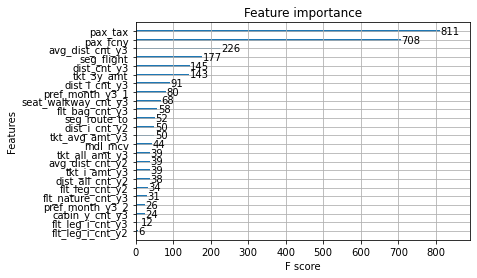

In [18]:


# XGBoost训练过程
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = xgb.XGBRegressor(objective='binary:logistic')
model.fit(X_train, y_train)

# 对测试集进行预测
ans = model.predict(X_test)

# 显示重要特征
plot_importance(model)
plt.show()